## Defining a basic simulation on a real graph

### Imports
Import the required libraries

In [1]:
import opentnsim
print('This notebook has been tested with OpenTNSim version {}'.format(opentnsim.__version__))

This notebook has been tested with OpenTNSim version 1.1.2


In [2]:
# Used for mathematical functions
# package(s) related to time, space and id
import math             
import datetime
import time
import platform
import random
import os
import pathlib

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy

# spatial libraries 
import pyproj
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np
import matplotlib.pyplot as plt

# OpenTNSIM
import opentnsim
import opentnsim.core as core


# Used for making the graph to visualize our problem
import networkx as nx  

In [3]:
src_dir = pathlib.Path(opentnsim.__file__).parent.parent

In [4]:
# Graph location
location_graph = src_dir / "notebooks"
name_graph = location_graph / "Shape-Files" / "Rotterdam-Antwerpen-corridor" / "edges_2.shp"


### Create graph

We will now visualize the network based on the file edges_2.shp
**Important**: 

If you use windows and get the following error "ImportError: read_shp requires OGR: http://www.gdal.org/", you probably have [this issue](https://github.com/conda-forge/gdal-feedstock/issues/219). Solving it is possible by running the following commands in your terminal (as explained [here](https://gis.stackexchange.com/questions/294231/installing-gdal-with-anaconda):

```bash
#Create a new virtual environment
conda create -n testgdal -c conda-forge gdal vs2015_runtime=14

#Activate virtual environment
activate testgdal

#Open Jupyter notebook
jupyer notebook
```

/var/folders/fh/tcbrjg6n28b0lzjzh07b5t6m0000gn/T/ipykernel_80130/3540487524.py:2: DeprecationWarning:

read_shp is deprecated and will be removed in 3.0.See https://networkx.org/documentation/latest/auto_examples/index.html#geospatial.



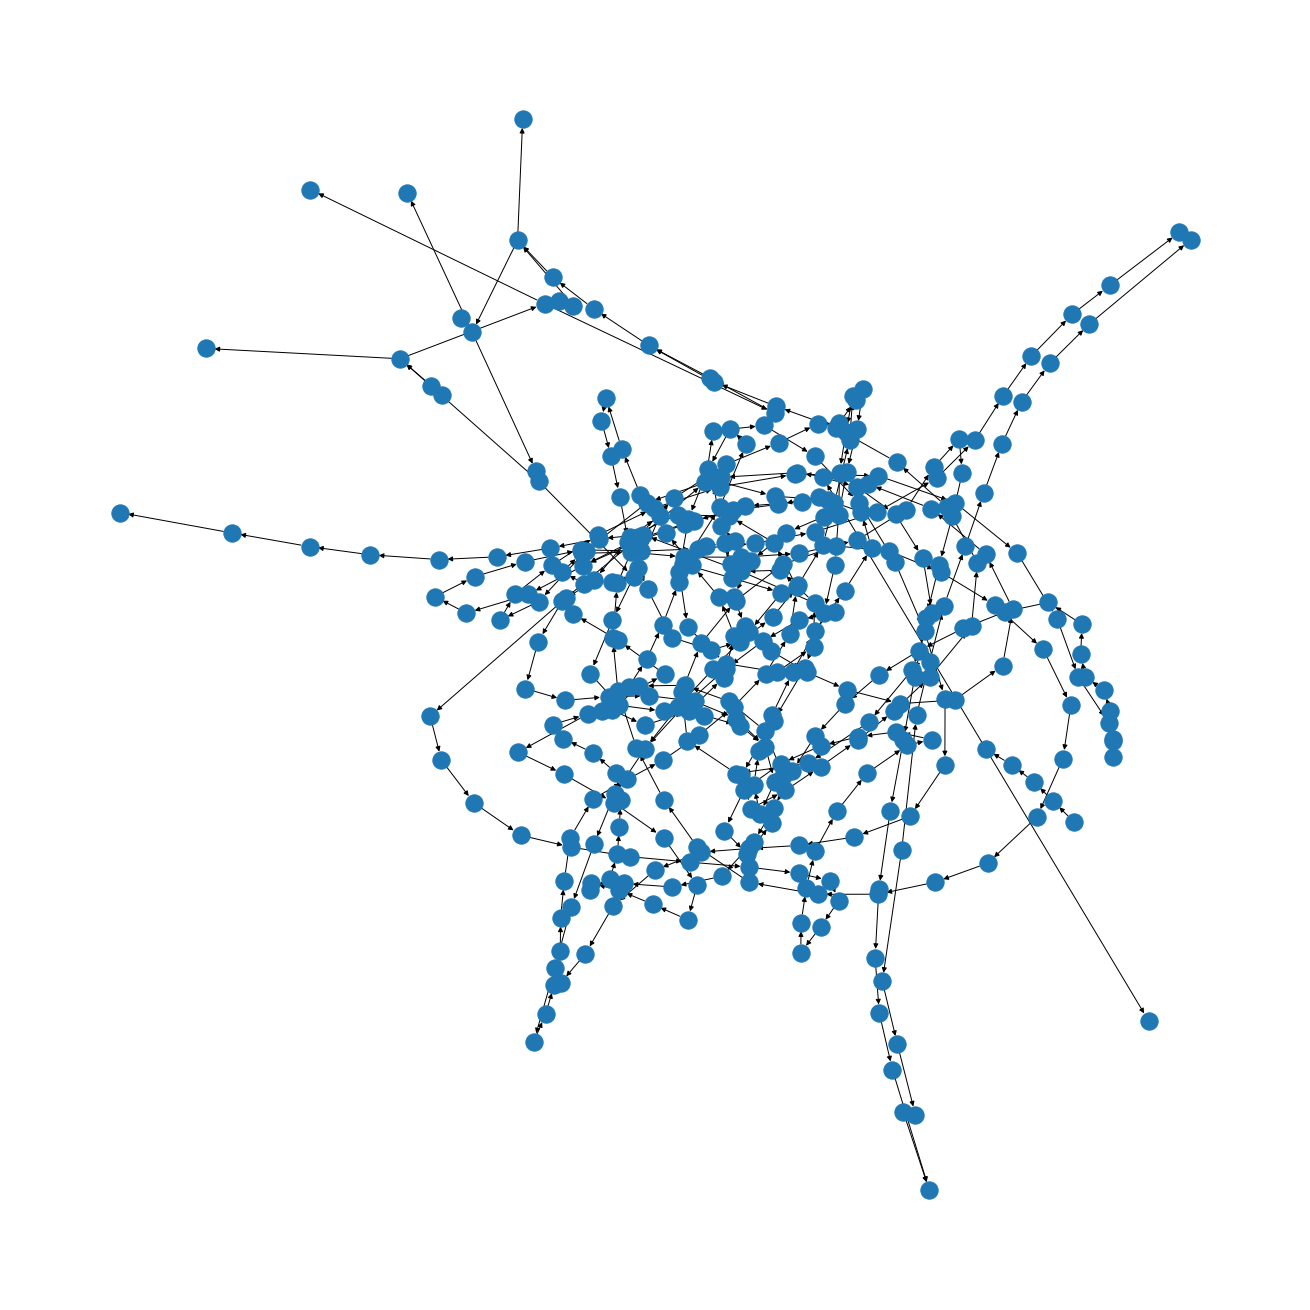

In [5]:
# Read the shape-file
FG = nx.read_shp(os.path.join(location_graph, name_graph), 
                 simplify=True)

# Draw the shape-file to get a first impression
plt.figure(figsize=(18,18))
nx.draw(FG)

# Show the drawing
plt.show()

/var/folders/fh/tcbrjg6n28b0lzjzh07b5t6m0000gn/T/ipykernel_80130/2105611717.py:5: ShapelyDeprecationWarning:

The proxy geometries (through the 'asShape()', 'asPoint()' or 'PointAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Point()' constructor instead.

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-pa

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/sit

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = True
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute
Exception ignored in: <function BaseGeometry.__del__ at 0x12421a160>
Traceback (most recent call last):
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    self._empty(val=None)
  File "/Users/baart_f/.virtualenvs/opentnsim/lib/python3.9/site-packages/shapely/geometry/base.py", line 199, in _empty
    self._is_empty = Tru

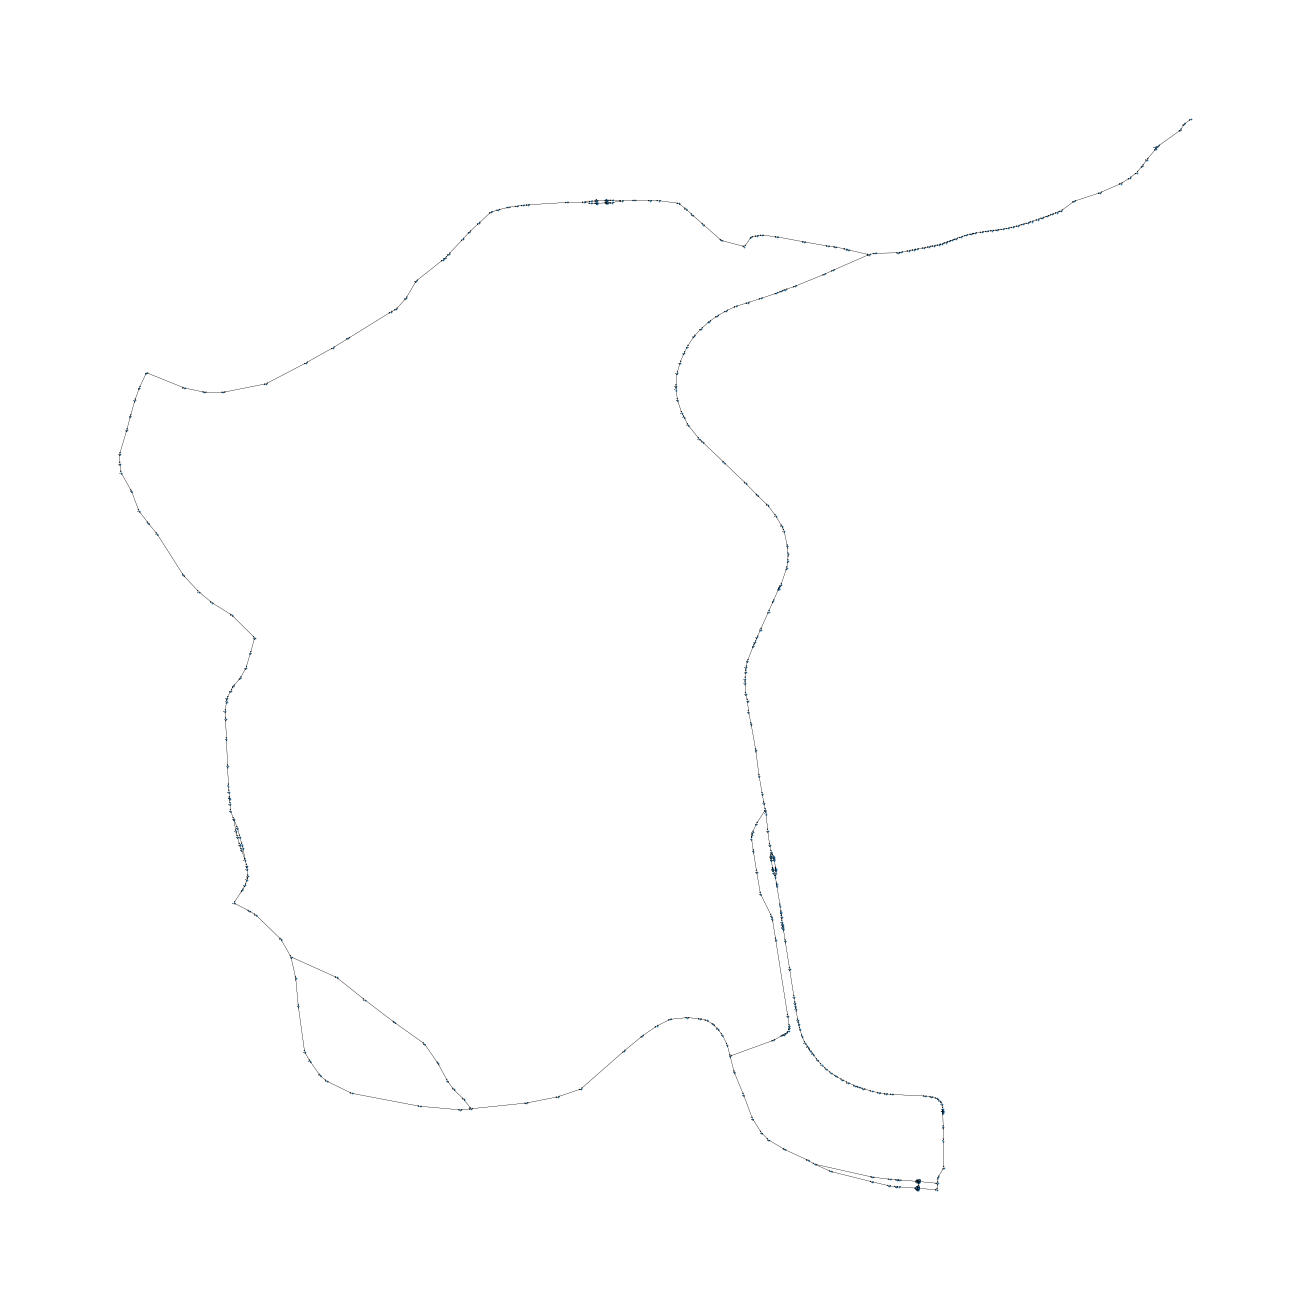

In [6]:
# calculate distance between two points
def calculate_distance(orig, dest):
    wgs84 = pyproj.Geod(ellps='WGS84')
    
    distance = wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                         shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2]
    
    return distance

H_G = nx.Graph()

lat_lon_to_index = {}
edge_id_counter = 0

for i, node in enumerate(FG.nodes(data = True)):
    H_G.add_node(i, pos = node[0], 
                    name = "Node {}".format(i),
                    geometry = shapely.geometry.Point(node[0][0], node[0][1]))
    lat_lon_to_index[node[0]] = i

    
for edge in FG.edges(data=True): 
    H_G.add_edge(lat_lon_to_index[edge[0]], 
                 lat_lon_to_index[edge[1]],
                 dis= calculate_distance(nx.get_node_attributes(H_G, 'geometry')[lat_lon_to_index[edge[1]]], 
                                         nx.get_node_attributes(H_G, 'geometry')[lat_lon_to_index[edge[0]]]))

FG = H_G.to_directed()
plt.figure(figsize=(18,18))
nx.draw(FG, nx.get_node_attributes(FG, 'pos'), with_labels=True, node_size=0.5, font_size = 2, width = 0.2, arrowsize = 3)
plt.show()

### Create vessels
Vessel without graph, but with shortest path.

In [7]:
# Make a class out of mix-ins
TransportResource = type('TransportResource', 
                         (core.Identifiable, core.ContainerDependentMovable, 
                          core.HasResource, core.Routeable), {})



# For testing purposes we only want v to be 1
def compute_v_provider(v_empty, v_full):
    return lambda x: 1

data_vessel = {"env": None,
               "name": "Vessel number 1",
               "route": None,
               "geometry": shapely.geometry.Point(0, 0),  # lon, lat
               "capacity": 1_000,
               "compute_v": compute_v_provider(v_empty=1, v_full=1)}

# create the transport processing resource
vessel = TransportResource(**data_vessel)

TypeError: __init__() missing 1 required positional argument: 'v'

### Define paths

In [ ]:
# First simulation is from random node 1 to random node 2 and shortest path is found using the Dijkstra algoritm
random_1 = random.choice(list(FG))
random_2 = random.choice(list(FG))

path_1 = nx.dijkstra_path(FG, random_1, random_2)
print(path_1)

In [ ]:
# Construct another path from random node 1 to random node 2
random_1 = random.choice(list(FG))
random_2 = random.choice(list(FG))

path_2 = nx.dijkstra_path(FG, random_1, random_2)
print(path_2)

In [ ]:
paths = [path_1, path_2]

### Run simulation

Now we run a simulation for the two constructed paths

In [ ]:
def start(env, vessel):
    while True:
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

In [ ]:
for path in enumerate(paths):
    # Start simpy environment
    simulation_start = datetime.datetime.now()
    env = simpy.Environment(initial_time = time.mktime(simulation_start.timetuple()))
    env.epoch = time.mktime(simulation_start.timetuple())
    
    # Add graph to environment
    env.FG = FG
    
    # Add environment and path to the vessel
    vessel.env = env
    vessel.route = path[1]

    # Start the simulation
    env.process(start(env, vessel))
    env.run()

    print("Simulation of path {} took {} seconds".format(path[0] + 1, int(env.now)))

### Testing
With v = 1 the distance of a path should be equal to the simulation time.

If simulation time == distance of path, test succeeds.

In [ ]:
#Compute the distances of the two paths, are they the same as the simulation time reported above?

wgs84 = pyproj.Geod(ellps='WGS84')
distance_path_1 = 0
distance_path_2 = 0

for node in enumerate(path_1):
    orig = nx.get_node_attributes(FG, "geometry")[path_1[node[0]]]
    dest = nx.get_node_attributes(FG, "geometry")[path_1[node[0] + 1]]

    distance_path_1 += int(wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                                     shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2])
    
    if node[0] + 2 == len(path_1):
                break

for node in enumerate(path_2):
    orig = nx.get_node_attributes(FG, "geometry")[path_2[node[0]]]
    dest = nx.get_node_attributes(FG, "geometry")[path_2[node[0] + 1]]

    distance_path_2 += int(wgs84.inv(shapely.geometry.asShape(orig).x, shapely.geometry.asShape(orig).y, 
                                     shapely.geometry.asShape(dest).x, shapely.geometry.asShape(dest).y)[2])
    
    if node[0] + 2 == len(path_2):
                break

print("Distance of path 1 is:",distance_path_1)
print("And of path 2:",distance_path_2)